In [ ]:
!pip install scikit-optimize
from tensorflow.keras import regularizers
from skopt import BayesSearchCV
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import PReLU
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras import Input
from tensorflow.keras.activations import softplus
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers.schedules import LearningRateSchedule
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import LearningRateScheduler
import math
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
from tensorflow.keras.regularizers import l1
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from sklearn.model_selection import cross_val_score

     |████████████████████████████████| 100 kB 2.5 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


# Data Pre-Processing

### All Features Dataset

In [ ]:
def all_features():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_all_features.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df['geo_value_t_minus_1'] = clean_good_full_df['geo_value_t_minus_1'].astype("float")
    t = clean_good_full_df.iloc[:,0:10].reset_index()
    t_minus_1 = clean_good_full_df.iloc[:,10:20].reset_index()
    t_plus_1 = clean_good_full_df.iloc[:,20].reset_index()
    clean_good_full_df  = t_minus_1.merge(t, on = ['index']).merge(t_plus_1, on = ['index']).drop(columns = ['index']).reset_index(drop = True)
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value','time_value_t_minus_1'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    global X_df_scaled_reshaped
    global Y_df_scaled_reshaped
    global X_test_df_scaled_reshaped
    global Y_test_df_scaled_reshaped
    global X_cv_df_scaled_reshaped
    global Y_cv_df_scaled_reshaped
    #Scaling and Reshaping
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:18]
    y_full = full_df_scaled[:,18]
    X_train = X_full[0:4256,:]
    X_test = X_full[4256:,:]
    y_train = y_full[0:4256]
    y_test = y_full[4256:]
    X_cv = X_train
    y_cv = y_train

    X_df_scaled_reshaped = X_train.reshape(4256,2,9)
    Y_df_scaled_reshaped = y_train.reshape(4256,1)
    X_test_df_scaled_reshaped = X_test.reshape(1065,2,9)
    Y_test_df_scaled_reshaped = y_test.reshape(1065,1)
    X_cv_df_scaled_reshaped = X_cv.reshape(4256,2,9)
    Y_cv_df_scaled_reshaped = y_cv.reshape(4256,1)

### No Google Dataset

In [ ]:
def no_google():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_GoogleDropped.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df['geo_value_t_minus_1'] = clean_good_full_df['geo_value_t_minus_1'].astype("float")
    t = clean_good_full_df.iloc[:,0:8].reset_index()
    t_minus_1 = clean_good_full_df.iloc[:,8:16].reset_index()
    t_plus_1 = clean_good_full_df.iloc[:,16].reset_index()
    clean_good_full_df  = t_minus_1.merge(t, on = ['index']).merge(t_plus_1, on = ['index']).drop(columns = ['index']).reset_index(drop = True)
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value','time_value_t_minus_1'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    global X_df_scaled_reshaped
    global Y_df_scaled_reshaped
    global X_test_df_scaled_reshaped
    global Y_test_df_scaled_reshaped
    global X_cv_df_scaled_reshaped
    global Y_cv_df_scaled_reshaped
    #Scaling and Reshaping
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:14]
    y_full = full_df_scaled[:,14]
    X_train = X_full[0:6398,:]
    X_test = X_full[6398:,:]
    y_train = y_full[0:6398]
    y_test = y_full[6398:]
    X_cv = X_train
    y_cv = y_train

    X_df_scaled_reshaped = X_train.reshape(6398,2,7)
    Y_df_scaled_reshaped = y_train.reshape(6398,1)
    X_test_df_scaled_reshaped = X_test.reshape(1600,2,7)
    Y_test_df_scaled_reshaped = y_test.reshape(1600,1)
    X_cv_df_scaled_reshaped = X_cv.reshape(6398,2,7)
    Y_cv_df_scaled_reshaped = y_cv.reshape(6398,1)

### No Home Time Dataset

In [ ]:
def no_home():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTimeDropped.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df['geo_value_t_minus_1'] = clean_good_full_df['geo_value_t_minus_1'].astype("float")
    t = clean_good_full_df.iloc[:,0:9].reset_index()
    t_minus_1 = clean_good_full_df.iloc[:,9:18].reset_index()
    t_plus_1 = clean_good_full_df.iloc[:,18].reset_index()
    clean_good_full_df  = t_minus_1.merge(t, on = ['index']).merge(t_plus_1, on = ['index']).drop(columns = ['index']).reset_index(drop = True)
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value','time_value_t_minus_1'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    global X_df_scaled_reshaped
    global Y_df_scaled_reshaped
    global X_test_df_scaled_reshaped
    global Y_test_df_scaled_reshaped
    global X_cv_df_scaled_reshaped
    global Y_cv_df_scaled_reshaped
    #Scaling and Reshaping
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:16]
    y_full = full_df_scaled[:,16]
    X_train = X_full[0:5948,:]
    X_test = X_full[5948:,:]
    y_train = y_full[0:5948]
    y_test = y_full[5948:]
    X_cv = X_train
    y_cv = y_train

    X_df_scaled_reshaped = X_train.reshape(5948,2,8)
    Y_df_scaled_reshaped = y_train.reshape(5948,1)
    X_test_df_scaled_reshaped = X_test.reshape(1488,2,8)
    Y_test_df_scaled_reshaped = y_test.reshape(1488,1)
    X_cv_df_scaled_reshaped = X_cv.reshape(5948,2,8)
    Y_cv_df_scaled_reshaped = y_cv.reshape(5948,1)

### No Google and No Home Time Dataset

In [ ]:
def no_home_no_google():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTimeDropped_GoogleDropped.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df['geo_value_t_minus_1'] = clean_good_full_df['geo_value_t_minus_1'].astype("float")
    t = clean_good_full_df.iloc[:,0:7].reset_index()
    t_minus_1 = clean_good_full_df.iloc[:,7:14].reset_index()
    t_plus_1 = clean_good_full_df.iloc[:,14].reset_index()
    clean_good_full_df  = t_minus_1.merge(t, on = ['index']).merge(t_plus_1, on = ['index']).drop(columns = ['index']).reset_index(drop = True)
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value','time_value_t_minus_1'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    global X_df_scaled_reshaped
    global Y_df_scaled_reshaped
    global X_test_df_scaled_reshaped
    global Y_test_df_scaled_reshaped
    global X_cv_df_scaled_reshaped
    global Y_cv_df_scaled_reshaped
    #Scaling and Reshaping
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:12]
    y_full = full_df_scaled[:,12]
    X_train = X_full[0:9048,:]
    X_test = X_full[9048:,:]
    y_train = y_full[0:9048]
    y_test = y_full[9048:]
    X_cv = X_train
    y_cv = y_train

    X_df_scaled_reshaped = X_train.reshape(9048,2,6)
    Y_df_scaled_reshaped = y_train.reshape(9048,1)
    X_test_df_scaled_reshaped = X_test.reshape(2263,2,6)
    Y_test_df_scaled_reshaped = y_test.reshape(2263,1)
    X_cv_df_scaled_reshaped = X_cv.reshape(9048,2,6)
    Y_cv_df_scaled_reshaped = y_cv.reshape(9048,1)

### Delta Dataset No Google and No Hometime

In [ ]:
def delta_noHome_noGoogle():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('delta_full_df_GoogleDropped_HomeTimeDropped.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:11]
    y_full = full_df_scaled[:,11]
    X_train = X_full[0:9048,:]
    X_test = X_full[9048:,:]
    y_train = y_full[0:9048]
    y_test = y_full[9048:]
    X_cv = X_train
    y_cv = y_train

### Delta Dataset No Hometime

In [ ]:
def delta_noHome():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('delta_full_df_HomeTimeDropped.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:15]
    y_full = full_df_scaled[:,15]
    X_train = X_full[0:5948,:]
    X_test = X_full[5948:,:]
    y_train = y_full[0:5948]
    y_test = y_full[5948:]
    X_cv = X_train
    y_cv = y_train

### Delta Dataset No Google

In [ ]:
def delta_noGoogle():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('delta_full_df_GoogleDropped.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:13]
    y_full = full_df_scaled[:,13]
    X_train = X_full[0:6398,:]
    X_test = X_full[6398:,:]
    y_train = y_full[0:6398]
    y_test = y_full[6398:]
    X_cv = X_train
    y_cv = y_train

### Delta Dataset All Features

In [ ]:
def delta_allFeatures():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('delta_full_df_all_features.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:17]
    y_full = full_df_scaled[:,17]
    X_train = X_full[0:4256,:]
    X_test = X_full[4256:,:]
    y_train = y_full[0:4256]
    y_test = y_full[4256:]
    X_cv = X_train
    y_cv = y_train

### Multiple Time Steps Datasets

In [ ]:
def no_google_6timesteps():
    #Reading in DF and Formatting
    global clean_good_full_df
    global time
    clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_GoogleDropped_6timesteps.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df['geo_value_t_minus_1'] = clean_good_full_df['geo_value_t_minus_1'].astype("float")
    clean_good_full_df['geo_value_t_minus_2'] = clean_good_full_df['geo_value_t_minus_2'].astype("float")
    clean_good_full_df['geo_value_t_minus_3'] = clean_good_full_df['geo_value_t_minus_3'].astype("float")
    clean_good_full_df['geo_value_t_minus_4'] = clean_good_full_df['geo_value_t_minus_4'].astype("float")
    clean_good_full_df['geo_value_t_minus_5'] = clean_good_full_df['geo_value_t_minus_5'].astype("float")
    time = clean_good_full_df.sort_values(by = 'time_value').drop(columns = [
    'time_value_t_minus_1','time_value_t_minus_2','time_value_t_minus_3','time_value_t_minus_4',
    'time_value_t_minus_5'])
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value',
    'time_value_t_minus_1','time_value_t_minus_2','time_value_t_minus_3','time_value_t_minus_4',
    'time_value_t_minus_5'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    global X_df_scaled_reshaped
    global Y_df_scaled_reshaped
    global X_test_df_scaled_reshaped
    global Y_test_df_scaled_reshaped
    global X_cv_df_scaled_reshaped
    global Y_cv_df_scaled_reshaped
    #Scaling and Reshaping
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:42]
    y_full = full_df_scaled[:,42]
    X_train = X_full[0:6695,:]
    X_test = X_full[6695:,:] 
    y_train = y_full[0:6695]
    y_test = y_full[6695:]
    X_cv = X_train
    y_cv = y_train
#(8402, 49
    X_df_scaled_reshaped = X_train.reshape(6695,6,7)
    Y_df_scaled_reshaped = y_train.reshape(6695,1)
    X_test_df_scaled_reshaped = X_test.reshape(1674,6,7)
    Y_test_df_scaled_reshaped = y_test.reshape(1674,1)
    X_cv_df_scaled_reshaped = X_cv.reshape(6695,6,7)
    Y_cv_df_scaled_reshaped = y_cv.reshape(6695,1)
no_google_6timesteps()

In [ ]:
def no_google_5timesteps():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_GoogleDropped_5timesteps.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df['geo_value_t_minus_1'] = clean_good_full_df['geo_value_t_minus_1'].astype("float")
    clean_good_full_df['geo_value_t_minus_2'] = clean_good_full_df['geo_value_t_minus_2'].astype("float")
    clean_good_full_df['geo_value_t_minus_3'] = clean_good_full_df['geo_value_t_minus_3'].astype("float")
    clean_good_full_df['geo_value_t_minus_4'] = clean_good_full_df['geo_value_t_minus_4'].astype("float")
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value',
    'time_value_t_minus_1','time_value_t_minus_2','time_value_t_minus_3','time_value_t_minus_4'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    global X_df_scaled_reshaped
    global Y_df_scaled_reshaped
    global X_test_df_scaled_reshaped
    global Y_test_df_scaled_reshaped
    global X_cv_df_scaled_reshaped
    global Y_cv_df_scaled_reshaped
    #Scaling and Reshaping
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:35]
    y_full = full_df_scaled[:,35]
    X_train = X_full[0:6695,:]
    X_test = X_full[6695:,:]
    y_train = y_full[0:6695]
    y_test = y_full[6695:]
    X_cv = X_train
    y_cv = y_train
#(8402, 49
    X_df_scaled_reshaped = X_train.reshape(6695,5,7)
    Y_df_scaled_reshaped = y_train.reshape(6695,1)
    X_test_df_scaled_reshaped = X_test.reshape(1795,5,7)
    Y_test_df_scaled_reshaped = y_test.reshape(1795,1)
    X_cv_df_scaled_reshaped = X_cv.reshape(6695,5,7)
    Y_cv_df_scaled_reshaped = y_cv.reshape(6695,1)
no_google_5timesteps()

In [ ]:
def no_google_4timesteps():
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_GoogleDropped_4timesteps.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df['geo_value_t_minus_1'] = clean_good_full_df['geo_value_t_minus_1'].astype("float")
    clean_good_full_df['geo_value_t_minus_2'] = clean_good_full_df['geo_value_t_minus_2'].astype("float")
    clean_good_full_df['geo_value_t_minus_3'] = clean_good_full_df['geo_value_t_minus_3'].astype("float")
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value',
    'time_value_t_minus_1','time_value_t_minus_2','time_value_t_minus_3'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    global X_df_scaled_reshaped
    global Y_df_scaled_reshaped
    global X_test_df_scaled_reshaped
    global Y_test_df_scaled_reshaped
    global X_cv_df_scaled_reshaped
    global Y_cv_df_scaled_reshaped
    #Scaling and Reshaping
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:28]
    y_full = full_df_scaled[:,28]
    X_train = X_full[0:6721,:]
    X_test = X_full[6721:,:]
    y_train = y_full[0:6721]
    y_test = y_full[6721:]
    X_cv = X_train
    y_cv = y_train
#(8402, 49
    X_df_scaled_reshaped = X_train.reshape(6721,4,7)
    Y_df_scaled_reshaped = y_train.reshape(6721,1)
    X_test_df_scaled_reshaped = X_test.reshape(1859,4,7)
    Y_test_df_scaled_reshaped = y_test.reshape(1859,1)
    X_cv_df_scaled_reshaped = X_cv.reshape(6721,4,7)
    Y_cv_df_scaled_reshaped = y_cv.reshape(6721,1)
no_google_4timesteps()

In [ ]:
def no_google_3timesteps():
    global clean_good_full_df
    global time
    #Reading in DF and Formatting
    clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_GoogleDropped_3timesteps.csv', index_col=0)
    #clean_good_full_df = pd.read_csv('imputed_clean_good_full_df_HomeTime.csv', index_col=0)
    clean_good_full_df['geo_value'] = clean_good_full_df['geo_value'].astype("float")
    clean_good_full_df['geo_value_t_minus_1'] = clean_good_full_df['geo_value_t_minus_1'].astype("float")
    clean_good_full_df['geo_value_t_minus_2'] = clean_good_full_df['geo_value_t_minus_2'].astype("float")
    time = clean_good_full_df.sort_values(by = 'time_value').drop(columns = [
    'time_value_t_minus_1','time_value_t_minus_2'])
    clean_good_full_df = clean_good_full_df.sort_values(by = 'time_value').drop(columns = ['time_value', 'time_value_t_minus_1','time_value_t_minus_2'])
    clean_good_full_df.shape
    global scaler
    scaler = StandardScaler()
    global full_df_scaled
    global X_full
    global y_full
    global X_train
    global X_test
    global y_train
    global y_test
    global X_cv
    global y_cv
    global X_df_scaled_reshaped
    global Y_df_scaled_reshaped
    global X_test_df_scaled_reshaped
    global Y_test_df_scaled_reshaped
    global X_cv_df_scaled_reshaped
    global Y_cv_df_scaled_reshaped
    #Scaling and Reshaping
    scaler = StandardScaler()
    scaler = scaler.fit(clean_good_full_df)
    full_df_scaled = scaler.transform(clean_good_full_df)
    X_full = full_df_scaled[:,0:21]
    y_full = full_df_scaled[:,21]
    X_train = X_full[0:6863,:]
    X_test = X_full[6863:,:]
    y_train = y_full[0:6863]
    y_test = y_full[6863:]
    X_cv = X_train
    y_cv = y_train
    global train_combined
    train_combined = pd.DataFrame(np.append(X_train, y_train.reshape(6863,1), axis = 1)).sample(frac = 1,replace = True).to_numpy()
    X_train = train_combined[:,0:21]
    y_train = train_combined[:,21]
#(8402, 49
    X_df_scaled_reshaped = X_train.reshape(6863,3,7)
    Y_df_scaled_reshaped = y_train.reshape(6863,1)
    X_test_df_scaled_reshaped = X_test.reshape(1747,3,7)
    Y_test_df_scaled_reshaped = y_test.reshape(1747,1)
    X_cv_df_scaled_reshaped = X_cv.reshape(6863,3,7)
    Y_cv_df_scaled_reshaped = y_cv.reshape(6863,1)
no_google_3timesteps()

In [ ]:
#Regular
all_features()
no_google()
no_home()
no_home_no_google()

#Delta
delta_allFeatures()
delta_noGoogle()
delta_noHome()
delta_noHome_noGoogle()

#Multi Time steps
no_google_6timesteps()
no_google_5timesteps()
no_google_4timesteps()
no_google_3timesteps()

# Model Architecture

In [ ]:
from tensorflow.keras.callbacks import Callback
# Learning Rate schedulerclass EarlyStoppingByLossVal(Callback):
class EarlyStoppingByLossVal(Callback):
        def __init__(self, monitor='val_loss', value=0.00001, verbose=0):
                super(Callback, self).__init__()
                self.monitor = monitor
                self.value = value
                self.verbose = verbose

        def on_epoch_end(self, epoch, logs={}):
                current = logs.get(self.monitor)
                if current is None:
                        warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

                if current < self.value:
                        if self.verbose > 0:
                                print("Epoch %05d: early stopping THR" % epoch)
                        self.model.stop_training = True
def step_decay(epoch):
   initial_lrate = 0.01
   drop = 0.5
   epochs_drop = 9.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate
lrate = LearningRateScheduler(step_decay)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)
callbacks_list = [lrate, EarlyStoppingByLossVal(monitor='val_loss', value=4.5*10**(-5), verbose=1)]

### Single Layer Models

In [ ]:
#LSTM Model

from tensorflow.keras.constraints import max_norm
def create_LSTMmodel(optimizer="sgd", dropout_rate=0.4,
 activation='softplus', neurons1 = 96, init_mode='glorot_uniform' , learn_rate=0.01, momentum = 0.9):
    model = Sequential()
    model.add(LSTM(neurons1,activation = activation, kernel_initializer=init_mode,input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2]),kernel_constraint=max_norm(3), recurrent_constraint=max_norm(3), bias_constraint=max_norm(3)))
    #model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer=init_mode))
    model.compile(optimizer = SGD(lr=0.01,momentum= .9, clipnorm=1.0,clipvalue=0.5), loss = 'mse')
    return model
model = create_LSTMmodel()
model.summary()
#kernel_regularizer=regularizers.l2(l2=0.0001)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 96)                39936     
_________________________________________________________________
dense (Dense)                (None, 1)                 97        
Total params: 40,033
Trainable params: 40,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Bidirectional LSTM Model
def create_Bidirectional_LSTMmodel(optimizer="sgd", dropout_rate=0.0,
 activation='softplus', neurons1 = 128, init_mode='glorot_uniform', momentum = 0.9):
    model = Sequential()
    model.add(Bidirectional(LSTM(neurons1,activation = activation, kernel_initializer=init_mode),input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer=init_mode))
    model.compile(optimizer = SGD(lr=0.01,momentum= .9,clipnorm=1.0,clipvalue=0.5), loss = 'mse')
    return model
model = create_Bidirectional_LSTMmodel()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 256)               139264    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 139,521
Trainable params: 139,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#GRU Model
def create_GRUmodel(optimizer="sgd", dropout_rate=0.0, activation='softplus', neurons = 128, init_mode='glorot_uniform' , learn_rate=0.01, momentum = 0.9):
    model = Sequential()
    model.add(GRU(neurons, kernel_initializer=init_mode,activation= activation,input_shape = (X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(Y_df_scaled_reshaped.shape[1],kernel_initializer=init_mode))
    model.compile(optimizer = SGD(lr=0.0, momentum=momentum,clipnorm=1.0,clipvalue=0.5), loss = 'mse')
    return model
model = create_GRUmodel()
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 128)               52608     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 52,737
Trainable params: 52,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Convolutional Model
def create_Convmodel(optimizer="sgd", dropout_rate=0.2,
 activation='softplus', neurons1 = 256, neurons2 = 64,neurons3 = 8, init_mode='glorot_uniform' , learn_rate=0.01, momentum = 0.9):
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation=activation, input_shape = (X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation= activation))
    model.add(Dense(1,kernel_initializer=init_mode))
    model.compile(optimizer = SGD(lr=0.0, momentum=momentum,clipnorm=1.0,clipvalue=0.5), loss = 'mse')
    return model
model = create_Convmodel()
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 5, 64)             960       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 5, 64)             0         
_________________________________________________________________
flatten (Flatten)            (None, 320)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                16050     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 17,061
Trainable params: 17,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#RNN Model
def create_RNNmodel(optimizer="sgd", dropout_rate=0.0, activation='softplus', neurons = 128, init_mode='glorot_uniform' , learn_rate=0.01, momentum = 0.9):
    model = Sequential()
    model.add(SimpleRNN(neurons, kernel_initializer=init_mode,activation= activation,input_shape = (X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer=init_mode))
    model.compile(optimizer = SGD(lr=0.0, momentum=momentum,clipnorm=1.0,clipvalue=0.5), loss = 'mse')
    return model
model = create_RNNmodel()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               17408     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Feed-Forward Model
def create_FFmodel(optimizer="sgd", dropout_rate=0.0, activation='relu', neurons = 128, init_mode='glorot_uniform' , learn_rate=0.01, momentum = 0.9):
    model = Sequential()
    model.add(Flatten(input_shape = (X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
    model.add(Dense(neurons, activation=activation,kernel_initializer=init_mode))
    model.add(Dense(1,kernel_initializer=init_mode))
    model.compile(optimizer = SGD(lr=0.0, momentum=momentum,clipnorm=1.0,clipvalue=0.5), loss = 'mse')
    return model
model = create_FFmodel()
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 42)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               5504      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 129       
Total params: 5,633
Trainable params: 5,633
Non-trainable params: 0
_________________________________________________________________


### Complex Models

In [ ]:
# multiLayer-LSTM Model
def create_Bidirectional_multiLayer_LSTMmodel(optimizer="sgd", dropout_rate=0.0,
 activation='softplus', hidden_layers = 1, neurons1 = 128, neurons2 = 128,neurons3 = 128, init_mode='glorot_uniform' , learn_rate=0.01, momentum = 0.9):
    model = Sequential()
    if hidden_layers == 1:
        model.add(Bidirectional(LSTM(neurons1,activation= activation, kernel_initializer=init_mode),input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
    if hidden_layers == 2:
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True,activation= activation, kernel_initializer=init_mode),input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
        model.add(Bidirectional(LSTM(neurons1, kernel_initializer=init_mode)))
    if hidden_layers == 3:
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True,activation= activation, kernel_initializer=init_mode),input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode)))
        model.add(Bidirectional(LSTM(neurons1, kernel_initializer=init_mode)))
    if hidden_layers == 4:
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True,activation= activation, kernel_initializer=init_mode),input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode)))
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode)))
        model.add(Bidirectional(LSTM(neurons1, kernel_initializer=init_mode)))
    if hidden_layers == 5:
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True,activation= activation, kernel_initializer=init_mode),input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode)))
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode)))
        model.add(Bidirectional(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode)))
        model.add(Bidirectional(LSTM(neurons1, kernel_initializer=init_mode)))
    #if hidden_layers = 10:
    #if hidden_layers = 20:
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer=init_mode))
    model.compile(optimizer = SGD(lr=0.01,momentum= momentum,clipnorm=1.0,clipvalue=0.5), loss = 'mse')
    return model
model = create_Bidirectional_multiLayer_LSTMmodel()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 256)               139264    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 139,521
Trainable params: 139,521
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# multiLayer-LSTM Model
def create_multiLayer_LSTMmodel(optimizer="sgd", dropout_rate=0.0,
 activation='tanh', hidden_layers = 1, neurons1 = 256, neurons2 = 128,neurons3 = 128, init_mode='glorot_uniform' , learn_rate=0.01, momentum = 0.9):
    model = Sequential()
    if hidden_layers == 1:
        model.add(LSTM(neurons1,activation= activation, kernel_initializer=init_mode,input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
    if hidden_layers == 2:
        model.add(LSTM(neurons1, return_sequences=True,activation= activation, kernel_initializer=init_mode,input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
        model.add(LSTM(neurons1, kernel_initializer=init_mode))
    if hidden_layers == 3:
        model.add(LSTM(neurons1, return_sequences=True,activation= activation, kernel_initializer=init_mode,input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
        model.add(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode))
        model.add(LSTM(neurons1, kernel_initializer=init_mode))
    if hidden_layers == 4:
        model.add(LSTM(neurons1, return_sequences=True,activation= activation, kernel_initializer=init_mode,input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
        model.add(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode))
        model.add(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode))
        model.add(LSTM(neurons1, kernel_initializer=init_mode))
    if hidden_layers == 5:
        model.add(LSTM(neurons1, return_sequences=True,activation= activation, kernel_initializer=init_mode,input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
        model.add(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode))
        model.add(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode))
        model.add(LSTM(neurons1, return_sequences=True, kernel_initializer=init_mode))
        model.add(LSTM(neurons1, kernel_initializer=init_mode))
    #if hidden_layers = 10:
    #if hidden_layers = 20:
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer=init_mode))
    model.compile(optimizer = SGD(lr=0.01,momentum= momentum,clipnorm=1.0,clipvalue=0.5), loss = 'mse')
    return model
model = create_multiLayer_LSTMmodel()
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               270336    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 270,593
Trainable params: 270,593
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def create_Bidirectional_LSTM_Convmodel(optimizer="sgd", dropout_rate=0.0,
 activation='softplus', neurons1 = 9, neurons2 = 128,neurons3 = 128, init_mode='glorot_uniform' , learn_rate=0.01, momentum = 0.9):
    model = Sequential()
    model.add(Bidirectional(LSTM(neurons1, return_sequences=True,activation= activation, kernel_initializer=init_mode),input_shape=(X_df_scaled_reshaped.shape[1],X_df_scaled_reshaped.shape[2])))
    model.add(Conv1D(filters=64, kernel_size=2, activation=activation))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(1,kernel_initializer=init_mode))
    model.compile(optimizer = SGD(lr=0.0, momentum=momentum,clipnorm=1.0,clipvalue=0.5), loss = 'mse')
    return model
model = create_Bidirectional_LSTM_Convmodel()
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection (None, 2, 4)              160       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 1, 1)              9         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1, 1)              0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 2         
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________


# Dataset / Feature Selection

In [ ]:
#Regular
all_features()
no_google()
no_home()
no_home_no_google()

#Delta
delta_allFeatures()
delta_noGoogle()
delta_noHome()
delta_noHome_noGoogle()

In [ ]:
create_LSTMmodel()
create_Bidirectional_LSTMmodel()
create_GRUmodel()
create_Convmodel()
create_RNNmodel()
create_FFmodel()
create_Bidirectional_multiLayer_LSTMmodel()
create_multiLayer_LSTMmodel()
create_Bidirectional_LSTM_Convmodel()

In [ ]:
#No Google
no_google()
tscv = TimeSeriesSplit(n_splits=5)
bi_multi_model = KerasRegressor(build_fn=create_LSTMmodel, verbose=2, epochs = 40)
print(np.mean(cross_val_score(bi_multi_model, X_cv_df_scaled_reshaped , Y_cv_df_scaled_reshaped , cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

NameError: name 'create_LSTMmodel' is not defined

In [ ]:
#No Google
no_google()
tscv = TimeSeriesSplit(n_splits=5)
Bi_LSTM_model = KerasRegressor(build_fn=create_Bidirectional_LSTMmodel, verbose=2, epochs = 40)
print(np.mean(cross_val_score(Bi_LSTM_model, X_cv_df_scaled_reshaped , Y_cv_df_scaled_reshaped , cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

-0.04903872102439845


In [ ]:
#All Features
all_features()
tscv = TimeSeriesSplit(n_splits=5)
Bi_LSTM_model = KerasRegressor(build_fn=create_Bidirectional_LSTMmodel, verbose=2, epochs = 40)
print(np.mean(cross_val_score(Bi_LSTM_model, X_cv_df_scaled_reshaped , Y_cv_df_scaled_reshaped , cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

-0.008153595819397255


In [ ]:
#No Home
no_home()
tscv = TimeSeriesSplit(n_splits=5)
Bi_LSTM_model = KerasRegressor(build_fn=create_Bidirectional_LSTMmodel, verbose=2, epochs = 40)
print(np.mean(cross_val_score(Bi_LSTM_model, X_cv_df_scaled_reshaped , Y_cv_df_scaled_reshaped , cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

-0.011252653156316964


In [ ]:
#No Home, No Google
no_home_no_google()
tscv = TimeSeriesSplit(n_splits=5)
Bi_LSTM_model = KerasRegressor(build_fn=create_Bidirectional_LSTMmodel, verbose=2, epochs = 40)
print(np.mean(cross_val_score(Bi_LSTM_model, X_cv_df_scaled_reshaped , Y_cv_df_scaled_reshaped , cv= tscv, n_jobs = -1, scoring = 'neg_mean_squared_error')))

-0.009359750538754982


In [ ]:
from sklearn.model_selection import cross_val_score
# create dict to save all the cv scores 
cv_scores = {}
cv_scores['1 Timesteps'] = []
cv_scores['2 Timesteps'] = []
cv_scores['3 Timesteps'] = []
cv_scores['4 Timesteps'] = []
cv_scores['5 Timesteps'] = []

# forecast_models list
tscv = TimeSeriesSplit(n_splits=5)
#LSTM_model = KerasRegressor(build_fn=create_LSTMmodel, verbose=2, epochs = 10) # test with 10 epochs 
#Bi_LSTM_model = KerasRegressor(build_fn=create_Bi_Directional_LSTMmodel, verbose=2, epochs = 50)
#forecast_models = [LSTM_model,Bi_LSTM_model]

# for loop to run through models and epochs
for epoch in np.array([10,20,30,40,50, 60, 70, 80, 90, 100]):
    epoch_num = int(epoch)
    # LSTM Model
    no_google() 
    LSTM_model = KerasRegressor(build_fn=create_LSTMmodel, verbose=0, epochs = epoch_num)
    cv_scores['1 Timesteps'] += [np.mean(cross_val_score(LSTM_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]

    no_google_3timesteps()
    LSTM_model = KerasRegressor(build_fn=create_LSTMmodel, verbose=0, epochs = epoch_num)
    cv_scores['2 Timesteps'] += [np.mean(cross_val_score(LSTM_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]

    no_google_4timesteps()
    LSTM_model = KerasRegressor(build_fn=create_LSTMmodel, verbose=0, epochs = epoch_num)
    cv_scores['3 Timesteps'] += [np.mean(cross_val_score(LSTM_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]

    no_google_5timesteps()
    LSTM_model = KerasRegressor(build_fn=create_LSTMmodel, verbose=0, epochs = epoch_num)
    cv_scores['4 Timesteps'] += [np.mean(cross_val_score(LSTM_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]

    no_google_6timesteps()
    LSTM_model = KerasRegressor(build_fn=create_LSTMmodel, verbose=0, epochs = epoch_num)
    cv_scores['5 Timesteps'] += [np.mean(cross_val_score(LSTM_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]
    
    print('epoch '+ str(epoch) + ' done.')

epoch 10 done.
epoch 20 done.
epoch 30 done.
epoch 40 done.
epoch 50 done.
epoch 60 done.
epoch 70 done.
epoch 80 done.
epoch 90 done.
epoch 100 done.


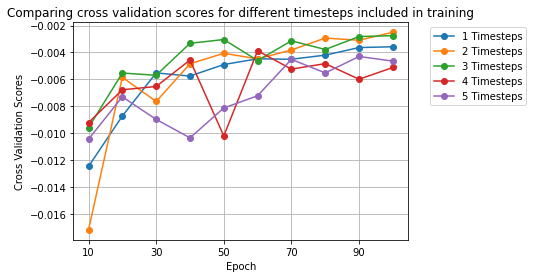

In [ ]:
cv_df = pd.DataFrame(cv_scores, index= ['10','20','30','40','50', '60', '70','80','90','100'])

cv_df.plot(marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cross Validation Scores")
plt.title("Comparing cross validation scores for different timesteps included in training")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Model Selection

In [ ]:
from sklearn.model_selection import cross_val_score
tscv = TimeSeriesSplit(n_splits=5)
no_google_6timesteps()
#no_google()
# create dict to save all the cv scores 
cv_scores = {}
cv_scores['LSTM'] = []
cv_scores['Bi LSTM'] = []
cv_scores['FF'] = []
cv_scores['Conv'] = []
cv_scores['RNN'] = []
cv_scores['GRU'] = []

# forecast_models list
tscv = TimeSeriesSplit(n_splits=5)
#LSTM_model = KerasRegressor(build_fn=create_LSTMmodel, verbose=2, epochs = 10) # test with 10 epochs 
#Bi_LSTM_model = KerasRegressor(build_fn=create_Bi_Directional_LSTMmodel, verbose=2, epochs = 50)
#forecast_models = [LSTM_model,Bi_LSTM_model]

# for loop to run through models and epochs
for epoch in np.array([10,20,30,40,50,60,70, 80, 90, 100, 110, 120 , 130, 140, 150]):
    epoch_num = int(epoch)

    # LSTM Model 
    LSTM_model = KerasRegressor(build_fn=create_LSTMmodel, verbose=0, epochs = epoch_num)
    cv_scores['LSTM'] += [np.mean(cross_val_score(LSTM_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]
    
    # Bi LSTM Model
    Bi_LSTM_model = KerasRegressor(build_fn=create_Bidirectional_LSTMmodel, verbose=0, epochs = epoch_num)
    cv_scores['Bi LSTM'] += [np.mean(cross_val_score(Bi_LSTM_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]
    
    # Multi Bi LSTM Model
    #Bi_multi_LSTM_model = KerasRegressor(build_fn=create_Bidirectional_multiLayer_LSTMmodel, verbose=0, epochs = epoch_num)
    #cv_scores['Bi Multi LSTM '+str(epoch)] = np.mean(cross_val_score(Bi_multi_LSTM_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))
    
    # Multi LSTM Model
    #Multi_LSTM_model = KerasRegressor(build_fn=create_multiLayer_LSTMmodel, verbose=0, epochs = epoch_num)
    #cv_scores['Multi LSTM '+str(epoch)] = np.mean(cross_val_score(Multi_LSTM_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))
    
    # FF Model
    #FF_model = KerasRegressor(build_fn=create_FFmodel, verbose=0, epochs = epoch_num)
    #cv_scores['FF'] += [np.mean(cross_val_score(FF_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]
    
    # Conv model 
    #Conv_model = KerasRegressor(build_fn=create_Convmodel, verbose=0, epochs = epoch_num)
    #cv_scores['Conv'] += [np.mean(cross_val_score(Conv_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]

    # RNN model 
    #RNN_model = KerasRegressor(build_fn=create_RNNmodel, verbose=0, epochs = epoch_num)
    #cv_scores['RNN'] += [np.mean(cross_val_score(RNN_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]

    # GRU model 
    #GRU_model = KerasRegressor(build_fn=create_GRUmodel, verbose=0, epochs = epoch_num)
    #cv_scores['GRU'] += [np.mean(cross_val_score(GRU_model, X_cv_df_scaled_reshaped, Y_cv_df_scaled_reshaped, cv= tscv))]
 
    print('epoch '+ str(epoch) + ' done.')



epoch 10 done.
epoch 20 done.
epoch 30 done.
epoch 40 done.
epoch 50 done.
epoch 60 done.
epoch 70 done.
epoch 80 done.
epoch 90 done.
epoch 100 done.
epoch 110 done.
epoch 120 done.
epoch 130 done.
epoch 140 done.
epoch 150 done.


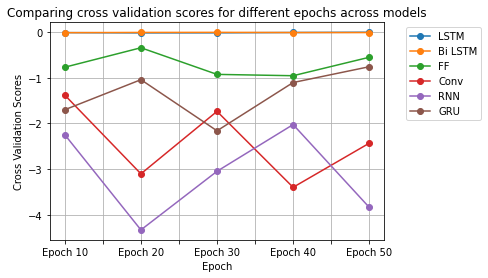

In [ ]:
# visualization + explanation 
cv_df = pd.DataFrame(cv_scores, index= ['Epoch 10','Epoch 20','Epoch 30','Epoch 40','Epoch 50'])

cv_df.plot(marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cross Validation Scores")
plt.title("Comparing cross validation scores for different epochs across models")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

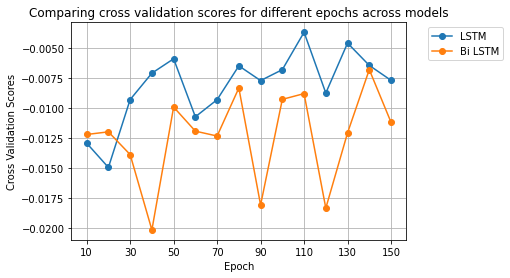

In [ ]:
cv_scores.pop('FF', None)
cv_scores.pop('Conv', None)
cv_scores.pop('RNN', None)
cv_scores.pop('GRU', None)
cv_df = pd.DataFrame(cv_scores, index= ['10','20','30','40','50', '60', '70', '80','90', '100', '110', '120' , '130', '140', '150'])
cv_df.iloc[:,:2].plot(marker="o")
plt.xlabel("Epoch")
plt.ylabel("Cross Validation Scores")
plt.title("Comparing cross validation scores for different epochs across models")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Hyper-Parameter Tuning

[]

In [ ]:
model = KerasRegressor(build_fn= create_multiLayer_LSTMmodel, verbose=1, epochs = 30)
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
activation = ['softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
batch_size = [2, 4, 8, 16, 32, 64, 128, 256]
neurons1 = [256, 512]
neurons2 = [8, 16, 32, 64, 128, 256]
neurons3 = [8, 16, 32, 64, 128, 256]
hidden_layers = [1,2 , 3 , 4 , 5]
epochs = [10, 30,  50, 70, 100]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
tscv = TimeSeriesSplit(n_splits=5)
param_grid = dict(batch_size = batch_size, dropout_rate = dropout_rate, activation= activation, hidden_layers = hidden_layers, momentum = momentum, neurons1 = neurons1)
grid = RandomizedSearchCV(estimator=model, n_iter = 20 ,param_distributions=param_grid, cv=tscv,n_jobs=-1,verbose = 2, )
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=tscv)
#grid = BayesSearchCV(estimator=model, search_spaces=param_grid, n_jobs=-1, cv=tscv, n_iter = 5, verbose = 1)
grid_result = grid.fit( X_cv_df_scaled_reshaped , Y_cv_df_scaled_reshaped, verbose = 1)

NameError: name 'create_multiLayer_LSTMmodel' is not defined

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#means = grid_result.cv_results_['mean_test_score']
#stds = grid_result.cv_results_['std_test_score']
#params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.003467 using {'activation': 'linear'}
-0.005195 (0.003973) with: {'activation': 'softplus'}
-0.034118 (0.049580) with: {'activation': 'softsign'}
-0.010156 (0.006519) with: {'activation': 'relu'}
-0.015307 (0.020636) with: {'activation': 'tanh'}
-0.020984 (0.025198) with: {'activation': 'sigmoid'}
-0.023543 (0.028380) with: {'activation': 'hard_sigmoid'}
-0.003467 (0.003376) with: {'activation': 'linear'}


# Training and Testing

Epoch 1/100
3432/3432 [==============================] - 14s 4ms/step - loss: 0.0802 - val_loss: 0.0507
Epoch 2/100
3432/3432 [==============================] - 12s 4ms/step - loss: 0.0043 - val_loss: 0.0032
Epoch 3/100
3432/3432 [==============================] - 12s 3ms/step - loss: 0.0023 - val_loss: 0.0031
Epoch 4/100
3432/3432 [==============================] - 12s 4ms/step - loss: 0.0015 - val_loss: 0.0013
Epoch 5/100
3432/3432 [==============================] - 13s 4ms/step - loss: 0.0011 - val_loss: 5.5337e-04
Epoch 6/100
3432/3432 [==============================] - 12s 4ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 7/100
3432/3432 [==============================] - 12s 3ms/step - loss: 0.0015 - val_loss: 0.0553
Epoch 8/100
3432/3432 [==============================] - 12s 4ms/step - loss: 0.0012 - val_loss: 3.8257e-04
Epoch 9/100
3432/3432 [==============================] - 17s 5ms/step - loss: 0.0016 - val_loss: 0.0558
Epoch 10/100
3432/3432 [==============================] 

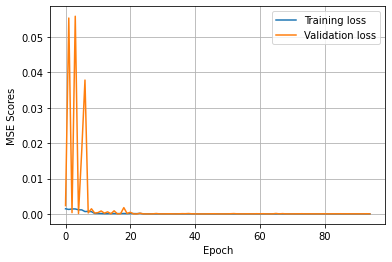

In [ ]:
# Train and Plot loss
no_google_3timesteps()
forecast_model =  create_LSTMmodel()
history = forecast_model.fit(X_df_scaled_reshaped, Y_df_scaled_reshaped,validation_data=(X_test_df_scaled_reshaped, Y_test_df_scaled_reshaped), epochs = 100, batch_size = 2, verbose=1, callbacks=callbacks_list)#callbacks=callbacks_list
plt.plot(history.history['loss'][5:], label='Training loss')
plt.plot(history.history['val_loss'][5:], label = 'Validation loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Scores")
plt.grid()
plt.legend()

In [ ]:
for i in np.arange(8,100):
    no_google_3timesteps()
    forecast_model =  create_LSTMmodel()
    history = forecast_model.fit(X_df_scaled_reshaped, Y_df_scaled_reshaped,validation_data=(X_test_df_scaled_reshaped, Y_test_df_scaled_reshaped), epochs = 100, batch_size = 2, verbose=1, callbacks=callbacks_list)#callbacks=callbacks_list
    forecast_model.save('forecast_model'+str(i))

Epoch 65/100
3432/3432 [==============================] - 12s 3ms/step - loss: 2.0692e-05 - val_loss: 1.0382e-04
Epoch 66/100
3432/3432 [==============================] - 12s 4ms/step - loss: 1.7563e-05 - val_loss: 1.0817e-04
Epoch 67/100
3432/3432 [==============================] - 12s 3ms/step - loss: 2.0807e-05 - val_loss: 1.0724e-04
Epoch 68/100
3432/3432 [==============================] - 12s 4ms/step - loss: 1.7967e-05 - val_loss: 1.0783e-04
Epoch 69/100
3432/3432 [==============================] - 12s 3ms/step - loss: 1.9111e-05 - val_loss: 1.1028e-04
Epoch 70/100
3432/3432 [==============================] - 12s 3ms/step - loss: 1.7168e-05 - val_loss: 1.0670e-04
Epoch 71/100
3432/3432 [==============================] - 12s 4ms/step - loss: 1.6508e-05 - val_loss: 1.0905e-04
Epoch 72/100
3432/3432 [==============================] - 12s 3ms/step - loss: 1.9572e-05 - val_loss: 1.1304e-04
Epoch 73/100
3432/3432 [==============================] - 12s 3ms/step - loss: 2.4476e-05 - val_

KeyboardInterrupt: 

In [ ]:
forecast_model = create_FFmodel()
history = forecast_model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs = 100, batch_size = 8, verbose=1, callbacks=callbacks_list)
plt.plot(history.history['loss'][5:], label='Training loss')
plt.plot(history.history['val_loss'][5:], label = 'Validation loss')
plt.xlabel("Epoch")
plt.ylabel("MSE Scores")
plt.grid()
plt.legend()

NameError: name 'create_FFmodel' is not defined

In [ ]:
import tensorflow as tf; print(tf.__version__)

2.4.1


In [ ]:

from tensorflow import keras
def ensemble_load():
    global forecast_ensemble
    forecast_ensemble = list()
    for i in np.arange(8):
        reconstructed_model = keras.models.load_model("forecast_model"+str(i))
        forecast_ensemble.append(reconstructed_model)
def ensemble_predict(ensemble, number_of_predictions):
    predictions = np.zeros(number_of_predictions)
    for model in np.arange(len(ensemble)):
        forecast = ensemble[model].predict(X_test_df_scaled_reshaped)
        full_scaled_df_forecast = np.append(X_test, forecast, axis = 1)
        full_df_forecast = scaler.inverse_transform(full_scaled_df_forecast)
        predictions = predictions + full_df_forecast[:,full_df_scaled.shape[1]-1]
    predictions = predictions / len(ensemble)
    return predictions
def ensemble_rsme(ensemble):
    for model in np.arange(len(ensemble)):
        forecast = ensemble[model].predict(X_test_df_scaled_reshaped)
        full_scaled_df_forecast = np.append(X_test, forecast, axis = 1)
        full_df_forecast = scaler.inverse_transform(full_scaled_df_forecast)
        test_df_transformed = scaler.inverse_transform(full_df_scaled[int(6863):,:])
        print('RMSE: ',np.sqrt(mean_squared_error(test_df_transformed[:,full_df_scaled.shape[1]-1], full_df_forecast[:,full_df_scaled.shape[1]-1])))


In [ ]:
ensemble_load()

In [ ]:
ensemble_rsme(forecast_ensemble)

RMSE:  883.2408976506175
RMSE:  706.9516520361925
RMSE:  851.1251836329398
RMSE:  877.217921316251
RMSE:  714.5290387977115
RMSE:  882.3204028078022
RMSE:  881.1847012161662
RMSE:  867.0039216194143


In [ ]:
test = ensemble_predict(forecast_ensemble, 1747)

In [ ]:
from sklearn.metrics import median_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

test_df_transformed = scaler.inverse_transform(full_df_scaled[int(6863):,:])
#full_df_forecast = full_df_forecast.clip(min=0)
print('RMSE: ',np.sqrt(mean_squared_error(test_df_transformed[:,full_df_scaled.shape[1]-1], test)))
print('Median Absolute Error: ',median_absolute_error(test_df_transformed[:,full_df_scaled.shape[1]-1], test))
print('Max Error: ',max_error(test_df_transformed[:,full_df_scaled.shape[1]-1], test))
print('R squared Score: ', r2_score(test_df_transformed[:,full_df_scaled.shape[1]-1], test))

RMSE:  677.7825422447407
Median Absolute Error:  353.6334730070521
Max Error:  5244.0236521973275
R squared Score:  0.9999904765652292


### Non - FF Test

In [ ]:
forecast = forecast_model.predict(X_test_df_scaled_reshaped)
full_scaled_df_forecast = np.append(X_test, forecast, axis = 1)
full_df_forecast = scaler.inverse_transform(full_scaled_df_forecast)
test_df_transformed = scaler.inverse_transform(full_df_scaled[int(6863):,:])
#full_df_forecast = full_df_forecast.clip(min=0)
print('RMSE: ',np.sqrt(mean_squared_error(test_df_transformed[:,full_df_scaled.shape[1]-1], full_df_forecast[:,full_df_scaled.shape[1]-1])))
print('Scaled MSE: ' , mean_squared_error(full_df_scaled[int(6863):,full_df_scaled.shape[1]-1],
 full_scaled_df_forecast[:,full_df_scaled.shape[1]-1]))

RMSE:  966.9673177808254
Scaled MSE:  5.3476566521586154e-05


In [ ]:
forecast_train = forecast_model.predict(X_df_scaled_reshaped)
full_scaled_df_forecast_train = np.append(X_train, forecast_train, axis = 1)
full_df_forecast_train = scaler.inverse_transform(full_scaled_df_forecast_train)
test_df_transformed_train = scaler.inverse_transform(train_combined[0:6863,:])
#full_df_forecast = full_df_forecast.clip(min=0)
print('RMSE: ',np.sqrt(mean_squared_error(test_df_transformed_train[:,full_df_scaled.shape[1]-1], full_df_forecast_train[:,full_df_scaled.shape[1]-1])))
print('Scaled MSE: ' , mean_squared_error(train_combined[0:6863:,full_df_scaled.shape[1]-1],
 full_scaled_df_forecast_train[:,full_df_scaled.shape[1]-1]))

RMSE:  664.8077847481788
Scaled MSE:  2.5277383448224485e-05


### FF Test

In [ ]:
forecast = forecast_model.predict(X_test)
full_scaled_df_forecast = np.append(X_test, forecast, axis = 1)
full_df_forecast = scaler.inverse_transform(full_scaled_df_forecast)
test_df_transformed = scaler.inverse_transform(full_df_scaled[int(full_df_scaled.shape[0]*.8):,:])
#full_df_forecast = full_df_forecast.clip(min=0)
print('RMSE: ',np.sqrt(mean_squared_error(test_df_transformed[:,full_df_scaled.shape[1]-1], full_df_forecast[:,full_df_scaled.shape[1]-1])))
print('Scaled MSE: ' , mean_squared_error(full_df_scaled[int(full_df_scaled.shape[0]*.8):,full_df_scaled.shape[1]-1],
 full_scaled_df_forecast[:,full_df_scaled.shape[1]-1]))

ValueError: in user code:

    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1478 predict_function  *
        return step_function(self, iterator)
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1468 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1461 run_step  **
        outputs = model.predict_step(data)
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1434 predict_step
        return self(x, training=False)
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /shared-libs/python3.7/py/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:223 assert_input_compatibility
        str(tuple(shape)))

    ValueError: Input 0 of layer sequential_28 is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 18)


/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


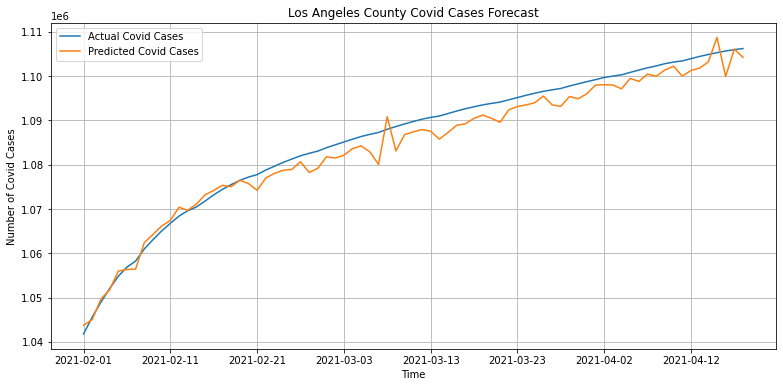

In [ ]:
time_values = time.iloc[6863:,:][time['geo_value_t_minus_2']==25].time_value
actual_covid_cases = clean_good_full_df.iloc[6863:,21][clean_good_full_df.iloc[6863:,[0,21]].geo_value_t_minus_2 == 25]
predicted_covid_cases = full_df_forecast[clean_good_full_df.iloc[6863:,[0,21]].geo_value_t_minus_2 == 25][:,full_df_scaled.shape[1]-1]

plt.figure(figsize=(13,6))
plt.plot(time_values, actual_covid_cases, label='Actual Covid Cases') 
plt.plot(time_values,predicted_covid_cases, label='Predicted Covid Cases') 
plt.title("Los Angeles County Covid Cases Forecast")
plt.xlabel("Time")
plt.ylabel("Number of Covid Cases")
plt.xticks(np.arange(0,77,10),time_values.to_numpy()[np.arange(0,77,10)])
plt.grid()
plt.legend()

In [ ]:
# create empty dictionary 
county_RMSE = {}

for county in clean_good_full_df.iloc[6863:,[0,21]].geo_value_t_minus_2.unique(): 
    # Train
    # filter to get predicted and actual covid cases for each county 
    predicted_covid_train = full_df_forecast_train[pd.DataFrame(test_df_transformed_train).iloc[0:6863,[0,21]][0] == county][:,full_df_scaled.shape[1]-1]
    actual_covid_train = test_df_transformed_train[0:6863,21][pd.DataFrame(test_df_transformed_train).iloc[0:6863,[0,21]][0] == county]
    
    # Test 
    # filter to get predicted and actual covid cases for each county 
    predicted_covid = full_df_forecast[clean_good_full_df.iloc[6863:,[0,21]].geo_value_t_minus_2 == county][:,full_df_scaled.shape[1]-1]
    actual_covid = clean_good_full_df.iloc[6863:,21][clean_good_full_df.iloc[6863:,[0,21]].geo_value_t_minus_2 == county]
    
    # calculate RMSE 
    RMSE_train = np.sqrt(np.mean(actual_covid_train - predicted_covid_train)**2)
    RMSE_test = np.sqrt(np.mean(actual_covid - predicted_covid)**2)

    # save RMSE
    county_RMSE[county] = [RMSE_train,RMSE_test]

In [ ]:
county_RMSE
# .rename(columns = {'6.0': 'Merced','22.0':'San Diego'})

# 6: minimum 56.95034971416714 - 6047 geovalue Merced County 
# 22: maximum 2064.8157958559805 - 6073 geovalue  San Diego 

{1.0: [40.18036222169072, 178.5434506920363],
 24.0: [17.324923943040925, 270.69538787665414],
 18.0: [21.005603864630476, 95.91017419727817],
 10.0: [83.51948391658716, 646.185644382926],
 20.0: [71.7470143346791, 82.63139989780365],
 15.0: [108.14337310151743, 820.0309533520073],
 16.0: [24.851795220418936, 818.8343802005301],
 23.0: [45.13872812754334, 513.4132822973925],
 3.0: [37.29907908969871, 394.648922211938],
 13.0: [32.44909763941472, 821.4791603417837],
 6.0: [130.18121930770772, 56.95034971416714],
 12.0: [193.7605172002328, 158.40938194073732],
 5.0: [131.1149685643198, 736.1212108358344],
 22.0: [337.03329037885203, 2064.8157958559805],
 7.0: [32.46098769544579, 431.65139980970616],
 25.0: [90.41440112349525, 1752.3556891558783],
 14.0: [182.02490127054804, 495.3122524508575],
 2.0: [57.17715631907652, 445.7291876347476],
 19.0: [30.323792828641455, 732.0380529513599],
 4.0: [180.11633187044717, 773.7402099306535],
 8.0: [13.970892242396413, 318.1574137027359],
 21.0: [0

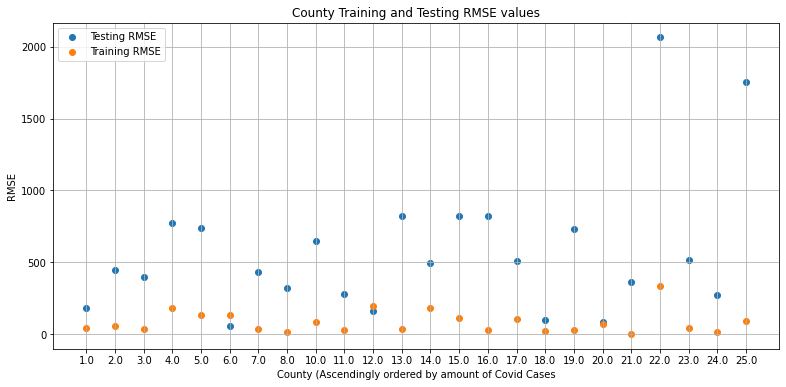

In [ ]:
RMSE_df = pd.DataFrame.from_dict(county_RMSE, orient='index').sort_index()

# plot 
plt.figure(figsize=(13,6))
plt.scatter(np.arange(1,25),RMSE_df[1], label='Testing RMSE')
plt.scatter(np.arange(1,25),RMSE_df[0], label='Training RMSE')
plt.title("County Training and Testing RMSE values")
plt.xlabel("County (Ascendingly ordered by amount of Covid Cases")
plt.ylabel("RMSE")
plt.xticks(np.arange(1,25),RMSE_df.index)
plt.grid()
plt.legend(loc='upper left')

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


<Figure size 1440x720 with 0 Axes>

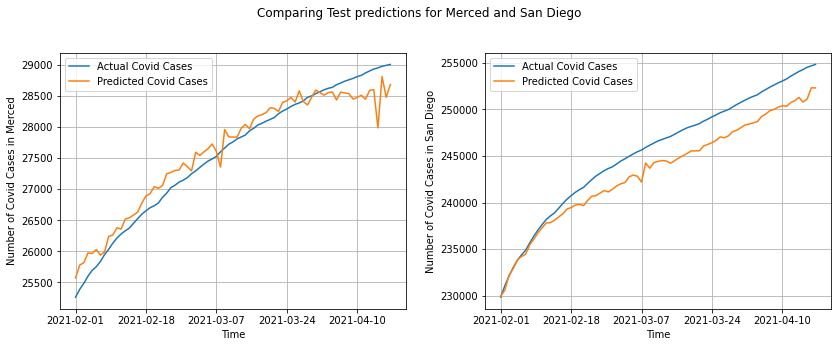

In [ ]:
# get predicted and actual values of merced 
time_values_merced = time.iloc[6863:,:][time['geo_value_t_minus_2']==6].time_value
actual_covid_cases_merced = clean_good_full_df.iloc[6863:,21][clean_good_full_df.iloc[6863:,[0,21]].geo_value_t_minus_2 == 6]
predicted_covid_cases_merced = full_df_forecast[clean_good_full_df.iloc[6863:,[0,21]].geo_value_t_minus_2 == 6][:,full_df_scaled.shape[1]-1]
merced_len = len(time_values_merced)

# get predicted and actual values of san diego 
time_values_sd = time.iloc[6863:,:][time['geo_value_t_minus_2']==22].time_value
actual_covid_cases_sd = clean_good_full_df.iloc[6863:,21][clean_good_full_df.iloc[6863:,[0,21]].geo_value_t_minus_2 == 22]
predicted_covid_cases_sd = full_df_forecast[clean_good_full_df.iloc[6863:,[0,21]].geo_value_t_minus_2 == 22][:,full_df_scaled.shape[1]-1]
sd_len = len(time_values_sd)

# plot 
# figure 1 
plt.figure(figsize=(20,10))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Comparing Test predictions for Merced and San Diego')
ax1.plot(time_values_merced, actual_covid_cases_merced, label='Actual Covid Cases')
ax1.plot(time_values_merced, predicted_covid_cases_merced, label='Predicted Covid Cases')
ax1.grid()
ax1.legend()
# figure 2
ax2.plot(time_values_sd, actual_covid_cases_sd, label='Actual Covid Cases')
ax2.plot(time_values_sd, predicted_covid_cases_sd, label='Predicted Covid Cases')
ax2.grid()
ax2.legend()

# labeling the plots 
# figure 1 
ax1.set_xlabel("Time")
ax1.set_ylabel("Number of Covid Cases in Merced")
plt.sca(ax1)
plt.xticks(np.arange(0,merced_len,17),time_values.to_numpy()[np.arange(0,merced_len,17)])
# figure 2 
ax2.set_xlabel("Time")
ax2.set_ylabel("Number of Covid Cases in San Diego")
plt.sca(ax2)
plt.xticks(np.arange(0,sd_len,17),time_values.to_numpy()[np.arange(0,sd_len,17)])
plt.tight_layout(pad=2.0)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=23c8e36e-a74e-49fc-afb9-820cfed248b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>